1. Завантажте набір даних про дитячі імена США з веб-сайту kaggle.com
(https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv)

In [1]:
import pandas as pd

names = pd.read_csv('NationalNames.csv')

2. Виведіть перші 8 рядків набору даних.

In [2]:
names.head(8)

Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414

3. Вивести останні 8 рядків набору даних.

In [3]:
names.tail(8)

Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5

4. Отримайте імена стовпців набору даних

In [4]:
names.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

5. Отримайте загальну інформацію про дані у наборі даних.

In [5]:
names.describe()

Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03  9.968000e+04

6. Знайдіть кількість унікальних імен у наборі даних

In [6]:
names['Name'].nunique()

93889

7. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі
даних

In [7]:
names.groupby('Gender').nunique()[['Name']]

Name
Gender       
F       64911
M       39199

8. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році

In [8]:
names[(names['Year'] == 2010) & (names['Gender'] == 'M')].sort_values('Count', ascending=False).head(5)

Id     Name  Year Gender  Count
1677392  1677393    Jacob  2010      M  22082
1677393  1677394    Ethan  2010      M  17985
1677394  1677395  Michael  2010      M  17308
1677395  1677396   Jayden  2010      M  17152
1677396  1677397  William  2010      M  17030

9. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)

In [9]:
name = names.sort_values('Count', ascending=False)[['Name', 'Year']].head(1).values[0]

In [10]:
print("The name is '%s' in %d" % (name[0], name[1]))

The name is 'Linda' in 1947


10. Підрахуйте кількість записів, для яких Count - мінімальне у наборі.

In [11]:
names[names['Count'] == names['Count'].min()]['Id'].count()

254615

11. Підрахуйте кількість унікальних імен у кожному році

In [12]:
names.groupby('Year')[['Name']].nunique().head(5)

Name
Year      
1880  1889
1881  1830
1882  2012
1883  1962
1884  2158

12. Знайдіть рік із найбільшою кількістю унікальних імен.

In [13]:
uniq_year = names.groupby('Year')[['Name']].nunique().sort_values('Name').tail(1)
uniq_year

Name
Year       
2008  32488

13. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

In [14]:
names[names['Year'] == uniq_year.index[0]].sort_values('Count').iloc()[-1]['Name']

'Jacob'

14. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен

In [15]:
names[(names['Name'] == 'Jacob') & (names['Gender'] == 'F')].sort_values('Count', ascending=False)[0:1]

Id   Name  Year Gender  Count
1455556  1455557  Jacob  2004      F    171

15. Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)

In [16]:
names.groupby(['Year', 'Name', 'Gender']).sum().unstack().dropna().groupby('Year')
    .count().stack().sort_values('Count').tail(1)[['Count']].droplevel(1)

Count
Year       
2008   2557

16. Знайдіть загальну кількість народжень за рік.

In [17]:
names.groupby('Year').sum()[['Count']].head(5)

Count
Year        
1880  201484
1881  192699
1882  221538
1883  216950
1884  243467

17. Знайдіть рік, коли народилося найбільше дітей

In [18]:
names.groupby('Year').sum().sort_values('Count').index[-1]

1957

18. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

In [19]:
names.groupby(['Year', 'Gender'])['Count'].sum().unstack().head(5)

Gender       F       M
Year                  
1880     90993  110491
1881     91954  100745
1882    107850  113688
1883    112321  104629
1884    129022  114445

19. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.

In [20]:
gendered = names.groupby(['Year', 'Gender'])[['Count']].sum().unstack().Count
gendered[gendered['F'] > gendered['M']].count()['F']

54

20. Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.

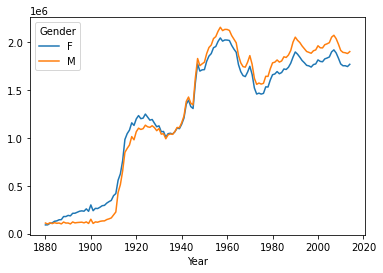

In [21]:
import matplotlib.pyplot as plt
names.groupby(['Year', 'Gender'])['Count'].sum().unstack().plot()
plt.show()

21. Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців)

In [22]:
len(set(names[names.Gender=='F']['Name'].values) & set(names[names.Gender=='M']['Name'].values))

10221

22. Порахуйте, скільки разів хлопчиків називали Barbara

In [23]:
names[(names['Name'] == 'Barbara') & (names['Gender'] == 'M')]['Count'].sum()

4139

23. Визначити рiк, коли народилося найбiльше дiвчат.

In [24]:
names[names.Gender == 'F'].groupby('Year').sum().sort_values('Count').index[-1]

1957

24. Порiвняти кiлькiсть новонароджених з iменами Donald та Joe.

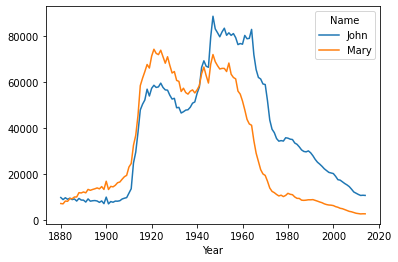

In [25]:
names[(names['Name'] == 'Mary') | (names['Name'] == 'John')].groupby(['Year', 'Name'])['Count'].sum().unstack().plot()
plt.show()

In [26]:
names[names['Gender'] == 'F'].groupby('Name')[['Count']].sum().sort_values('Count').tail(1)

Count
Name         
Mary  4115282